<a href="https://colab.research.google.com/github/avionerman/machine_learning_2025/blob/main/Exercise_10__Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('spotify_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (114000, 21)

Column Names:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


# Task1: Filtering and One-Hot Encoding the dataset

In [2]:
import pandas as pd

df = pd.read_csv('spotify_dataset.csv')

# part 1: Separate Metadata from Features
metadata_columns = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

df_metadata = df[metadata_columns].copy()
df_metadata = df_metadata.rename(columns={'Unnamed: 0': 'number'})

df_features = df.drop(columns=metadata_columns)

print(f"Metadata DataFrame shape: {df_metadata.shape}")
print(f"Features DataFrame shape: {df_features.shape}")
print(f"\nFeatures columns:\n{df_features.columns.tolist()}")

# part 2: One-Hot Encoding for Genres
print(f"\nNumber of unique genres: {df_features['track_genre'].nunique()}")
print(f"Sample genres: {df_features['track_genre'].unique()[:10]}")

df_encoded = pd.get_dummies(df_features, columns=['track_genre'], prefix='genre')

print(f"\nShape after One-Hot Encoding: {df_encoded.shape}")
print(f"Number of new genre columns: {df_encoded.shape[1] - df_features.shape[1] + 1}")

genre_columns = [col for col in df_encoded.columns if col.startswith('genre_')]
print(f"\nFirst 5 genre columns: {genre_columns[:5]}")
print(f"Last 5 genre columns: {genre_columns[-5:]}")

# verification
print("\n" + "=" * 50)
print("TASK 1 VERIFICATION")
print("=" * 50)

print(f"\n✓ Original rows: {len(df)}")
print(f"✓ Metadata rows: {len(df_metadata)}")
print(f"✓ Encoded features rows: {len(df_encoded)}")

print(f"\n✓ Original columns: {len(df.columns)}")
print(f"✓ Metadata columns: {len(df_metadata.columns)}")
print(f"✓ Feature columns (before encoding): {len(df_features.columns)}")
print(f"✓ Feature columns (after encoding): {len(df_encoded.columns)}")

print("\nPreview of encoded features (first 5 rows, first 10 columns):")
df_encoded.iloc[:5, :10]

Metadata DataFrame shape: (114000, 5)
Features DataFrame shape: (114000, 16)

Features columns:
['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Number of unique genres: 114
Sample genres: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil']

Shape after One-Hot Encoding: (114000, 129)
Number of new genre columns: 114

First 5 genre columns: ['genre_acoustic', 'genre_afrobeat', 'genre_alt-rock', 'genre_alternative', 'genre_ambient']
Last 5 genre columns: ['genre_techno', 'genre_trance', 'genre_trip-hop', 'genre_turkish', 'genre_world-music']

TASK 1 VERIFICATION

✓ Original rows: 114000
✓ Metadata rows: 114000
✓ Encoded features rows: 114000

✓ Original columns: 21
✓ Metadata columns: 5
✓ Feature columns (before encoding): 16
✓ Feature columns (after encoding): 129

Pr

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690


# Task 2: Normalization

In [3]:
from sklearn.preprocessing import StandardScaler

# separate numeric features from one-hot encoded genre columns
numeric_features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
                    'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

genre_columns = [col for col in df_encoded.columns if col.startswith('genre_')]

# converting boolean 'explicit' to int (True=1, False=0)
df_encoded['explicit'] = df_encoded['explicit'].astype(int)

# applying StandardScaler to numeric features only
# (genre columns are already 0/1, no need to scale them)
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("✓ Normalization complete using StandardScaler")
print(f"\nNormalized features statistics:")
print(df_encoded[numeric_features].describe().round(3))

# norm result
print("\nPreview of normalized data (first 5 rows, first 10 columns):")
df_encoded.iloc[:5, :10]

✓ Normalization complete using StandardScaler

Normalized features statistics:
       popularity  duration_ms    explicit  danceability      energy  \
count  114000.000   114000.000  114000.000    114000.000  114000.000   
mean       -0.000        0.000       0.000        -0.000       0.000   
std         1.000        1.000       1.000         1.000       1.000   
min        -1.490       -2.125      -0.306        -3.266      -2.550   
25%        -0.728       -0.503      -0.306        -0.638      -0.673   
50%         0.079       -0.141      -0.306         0.076       0.173   
75%         0.751        0.312      -0.306         0.739       0.845   
max         2.993       46.686       3.270         2.410       1.426   

              key    loudness        mode  speechiness  acousticness  \
count  114000.000  114000.000  114000.000   114000.000    114000.000   
mean       -0.000      -0.000      -0.000       -0.000         0.000   
std         1.000       1.000       1.000        1.000  

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness
0,1.782627,0.024575,-0.305767,0.629244,-0.717148,-1.210442,0.300828,-1.326281,0.551848,-0.850202
1,0.975633,-0.730859,-0.305767,-0.845908,-1.889980,-1.210442,-1.784744,0.753988,-0.078993,1.831732
2,1.065299,-0.160332,-0.305767,-0.742186,-1.122669,-1.491343,-0.293288,0.753988,-0.273826,-0.315499
3,1.692961,-0.243214,-0.305767,-1.733304,-2.312994,-1.491343,-2.039252,0.753988,-0.457309,1.774593
4,2.186125,-0.271919,-0.305767,0.295030,-0.788711,-0.929541,-0.282750,0.753988,-0.303145,0.463399


# Task 3: Applying K-Means

Running K-Means for different k values...
----------------------------------------
k =  2  |  SSE = 1,592,952.91
k =  3  |  SSE = 1,470,051.77
k =  5  |  SSE = 1,320,624.80
k =  7  |  SSE = 1,213,689.87
k = 10  |  SSE = 1,076,668.57
k = 15  |  SSE = 982,968.52
k = 20  |  SSE = 909,905.29
----------------------------------------


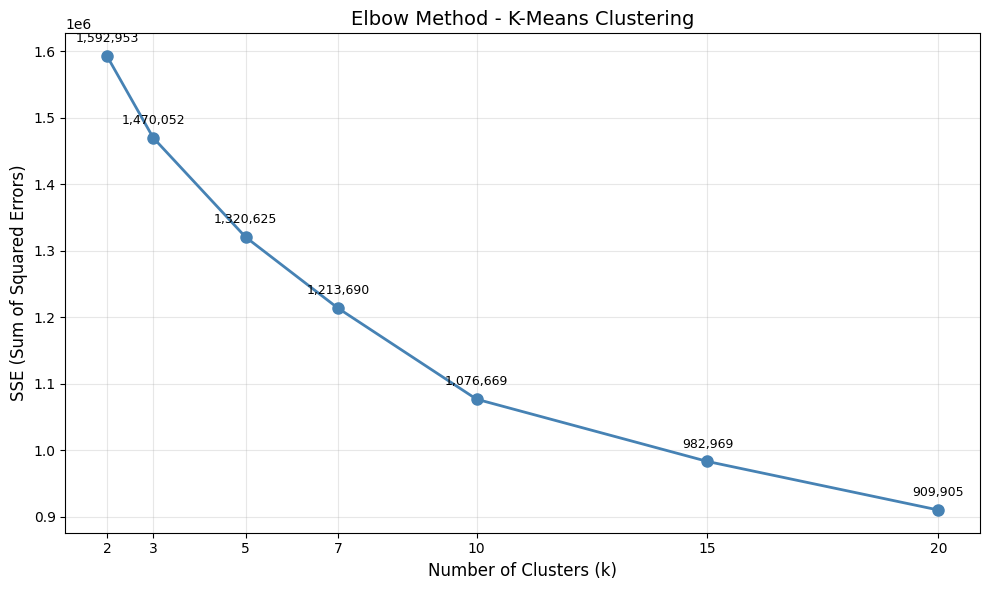

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [2, 3, 5, 7, 10, 15, 20]

sse_values = []

print("Running K-Means for different k values...")
print("-" * 40)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    sse = kmeans.inertia_
    sse_values.append(sse)
    print(f"k = {k:2d}  |  SSE = {sse:,.2f}")

print("-" * 40)

# plot generation
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('SSE (Sum of Squared Errors)', fontsize=12)
plt.title('Elbow Method - K-Means Clustering', fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

# annotating points with SSE values
for i, (k, sse) in enumerate(zip(k_values, sse_values)):
    plt.annotate(f'{sse:,.0f}', (k, sse), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

sse_results = dict(zip(k_values, sse_values))

# Task 4: Find optimum k using Elbow Methodology

In [5]:
# given the Elbow plot, we look for the "elbow" point where
# the rate of SSE decrease slows down significantly
# from the given SSE values:
# k=2→3: -120k | k=3→5: -150k | k=5→7: -105k
# k=7→10: -135k | k=10→15: -92k | k=15→20: -72k
#
# obviously the elbow appears around k=7 or k=10, where the decrease starts to flatten
# so i will pick k=7 as the optimal value

optimal_k = 7

print(f"Selected optimal k = {optimal_k} based on Elbow Method")
print("=" * 50)

# fitting K-Means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_encoded)

# getting cluster labels
labels = kmeans_final.labels_

# adding the new labels to metadata for later use
df_metadata['cluster'] = labels

# cluster dist.
print("\nCluster Distribution:")
print("-" * 30)
for cluster_id in range(optimal_k):
    count = (labels == cluster_id).sum()
    percentage = count / len(labels) * 100
    print(f"Cluster {cluster_id}: {count:,} tracks ({percentage:.1f}%)")

print(f"\nTotal tracks: {len(labels):,}")
print(f"SSE for k={optimal_k}: {kmeans_final.inertia_:,.2f}")

Selected optimal k = 7 based on Elbow Method

Cluster Distribution:
------------------------------
Cluster 0: 18,968 tracks (16.6%)
Cluster 1: 7,873 tracks (6.9%)
Cluster 2: 21,741 tracks (19.1%)
Cluster 3: 9,112 tracks (8.0%)
Cluster 4: 23,640 tracks (20.7%)
Cluster 5: 1,026 tracks (0.9%)
Cluster 6: 31,640 tracks (27.8%)

Total tracks: 114,000
SSE for k=7: 1,213,689.87


# Task 5: Calculate the % of the dominant genre (per cluster)

Dominant Genre per Cluster:
Cluster 0: black-metal (4.2%) - 794/18,968 tracks
Cluster 1: sleep (10.8%) - 851/7,873 tracks
Cluster 2: tango (3.8%) - 824/21,741 tracks
Cluster 3: emo (5.0%) - 460/9,112 tracks
Cluster 4: afrobeat (1.8%) - 427/23,640 tracks
Cluster 5: comedy (78.7%) - 807/1,026 tracks
Cluster 6: party (2.2%) - 701/31,640 tracks


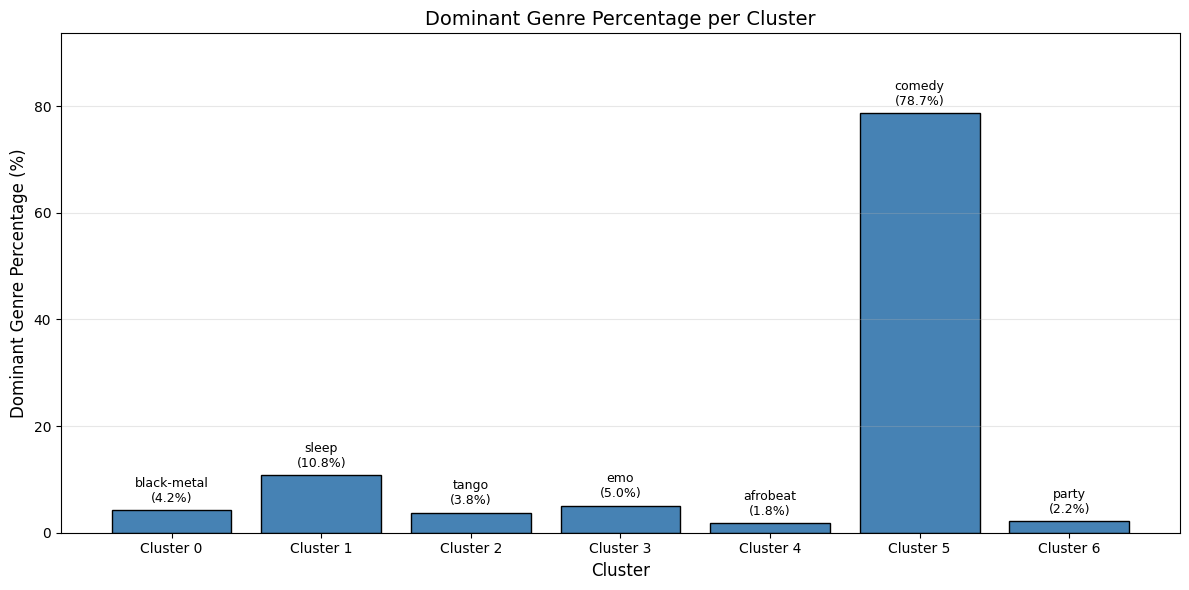

In [6]:
import matplotlib.pyplot as plt

# original genre from df_features (before onehot encoding)
df_metadata['genre'] = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])['track_genre']

dominant_genres = []
dominant_percentages = []

print("Dominant Genre per Cluster:")
print("=" * 60)

for cluster_id in range(optimal_k):
    # get tracks in this cluster
    cluster_mask = df_metadata['cluster'] == cluster_id
    cluster_genres = df_metadata[cluster_mask]['genre']

    # find the most common genre
    genre_counts = cluster_genres.value_counts()
    dominant_genre = genre_counts.index[0]
    dominant_count = genre_counts.iloc[0]
    total_in_cluster = len(cluster_genres)
    percentage = (dominant_count / total_in_cluster) * 100

    dominant_genres.append(dominant_genre)
    dominant_percentages.append(percentage)

    print(f"Cluster {cluster_id}: {dominant_genre} ({percentage:.1f}%) - {dominant_count:,}/{total_in_cluster:,} tracks")

print("=" * 60)

# bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(optimal_k), dominant_percentages, color='steelblue', edgecolor='black')

# applying dominant labels on the bar
for i, (bar, genre, pct) in enumerate(zip(bars, dominant_genres, dominant_percentages)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{genre}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Dominant Genre Percentage (%)', fontsize=12)
plt.title('Dominant Genre Percentage per Cluster', fontsize=14)
plt.xticks(range(optimal_k), [f'Cluster {i}' for i in range(optimal_k)])
plt.ylim(0, max(dominant_percentages) + 15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
from scipy.spatial.distance import euclidean
import numpy as np

print("Sample of popular tracks in the dataset:")
print("=" * 80)
popular_tracks = df_metadata[df['popularity'] > 70].sample(20, random_state=42)[['number', 'artists', 'track_name', 'cluster']]
print(popular_tracks.to_string(index=False))
print("=" * 80)



Sample of popular tracks in the dataset:
 number                       artists                                         track_name  cluster
  71630                  Alice Cooper                                             Poison        0
  44127                     Pearl Jam                                              Alive        4
  30684 Cheat Codes;Russell Dickerson                                         I Remember        4
  89950              Jhayco;Bad Bunny                             CÓMO SE SIENTE - Remix        3
  37352         Red Hot Chili Peppers                                          Otherside        6
  30573         Marshmello;Kane Brown                                    One Thing Right        6
  53401                  Travis Scott                                           YOSEMITE        3
  91350               Plain White T's                                  Hey There Delilah        2
  89400             Maluma;The Weeknd                                      Ha

# Euclidean distance song recommendation

In [8]:
from scipy.spatial.distance import euclidean

# selected Born To Be Wild by Steppenwolf (used the code above first to get the ID)
selected_index = 71528

selected_track = df_metadata.iloc[selected_index]
selected_cluster = selected_track['cluster']

print("=" * 60)
print("SELECTED TRACK")
print("=" * 60)
print(f"Title:   {selected_track['track_name']}")
print(f"Artist:  {selected_track['artists']}")
print(f"Cluster: {selected_cluster}")
print("=" * 60)

# getting all tracks in the same cluster (excluding the selected track AND tracks with the same name)
cluster_mask = (df_metadata['cluster'] == selected_cluster) & \
               (df_metadata.index != selected_index) & \
               (df_metadata['track_name'] != selected_track['track_name'])
cluster_indices = df_metadata[cluster_mask].index.tolist()

# getting the feature vectors - convert to float to avoid boolean subtraction error
selected_features = df_encoded.iloc[selected_index].values.astype(float)
cluster_features = df_encoded.iloc[cluster_indices].values.astype(float)

# calc. Euclidean distances
distances = []
for i, idx in enumerate(cluster_indices):
    dist = euclidean(selected_features, cluster_features[i])
    distances.append((idx, dist))

# sorting by distance and getting top 3
distances.sort(key=lambda x: x[1])
top_3 = distances[:3]

# display
print("\nTOP-3 RECOMMENDED SONGS (Euclidean Distance):")
print("-" * 60)
for rank, (idx, dist) in enumerate(top_3, 1):
    track = df_metadata.iloc[idx]
    print(f"\n{rank}. {track['track_name']}")
    print(f"   Artist:   {track['artists']}")
    print(f"   Distance: {dist:.4f}")
print("-" * 60)

euclidean_recommendations = top_3

SELECTED TRACK
Title:   Born To Be Wild
Artist:  Steppenwolf
Cluster: 0

TOP-3 RECOMMENDED SONGS (Euclidean Distance):
------------------------------------------------------------

1. I Ran (So Far Away)
   Artist:   A Flock Of Seagulls
   Distance: 2.1422

2. I Don't Care Anymore
   Artist:   Cathedral Bells
   Distance: 2.2918

3. This Is Not The End
   Artist:   Gareth Emery;Roddy Woomble
   Distance: 2.4004
------------------------------------------------------------


Την πρωτη φορα που το ετρεξα πηρα ουσιαστικα το ιδιο το τραγουδι που επελεξα 3 φορες, γιατι εχουν προφανως ακριβως την ιδια ευκλειδια αποσταση. Ετσι, προσθεσα μετα να μην λαβει υποψην τα duplicates και μου εβγαλε ως αποτελεσμα τα 3 που δεχινει τωρα η κονσολα.

# Task 7: Cosine distance song recommendation

In [9]:
from scipy.spatial.distance import cosine

# using the same selected track: Born To Be Wild by Steppenwolf
selected_index = 71528

selected_track = df_metadata.iloc[selected_index]
selected_cluster = selected_track['cluster']

print("=" * 60)
print("SELECTED TRACK")
print("=" * 60)
print(f"Title:   {selected_track['track_name']}")
print(f"Artist:  {selected_track['artists']}")
print(f"Cluster: {selected_cluster}")
print("=" * 60)

# getting all tracks in the same cluster (excluding the selected track AND tracks with the same name)
cluster_mask = (df_metadata['cluster'] == selected_cluster) & \
               (df_metadata.index != selected_index) & \
               (df_metadata['track_name'] != selected_track['track_name'])
cluster_indices = df_metadata[cluster_mask].index.tolist()

# getting the feature vectors - convert to float to avoid boolean subtraction error
selected_features = df_encoded.iloc[selected_index].values.astype(float)
cluster_features = df_encoded.iloc[cluster_indices].values.astype(float)

# calc. Cosine distances (1 - Cosine Similarity)
distances = []
for i, idx in enumerate(cluster_indices):
    dist = cosine(selected_features, cluster_features[i])
    distances.append((idx, dist))

# sorting by distance and getting top 3
distances.sort(key=lambda x: x[1])
top_3 = distances[:3]

# display
print("\nTOP-3 RECOMMENDED SONGS (Cosine Distance):")
print("-" * 60)
for rank, (idx, dist) in enumerate(top_3, 1):
    track = df_metadata.iloc[idx]
    print(f"\n{rank}. {track['track_name']}")
    print(f"   Artist:   {track['artists']}")
    print(f"   Distance: {dist:.4f}")
print("-" * 60)

cosine_recommendations = top_3

# comparison with euclidean
print("\n" + "=" * 60)
print("COMPARISON: EUCLIDEAN vs COSINE")
print("=" * 60)
print("\nEuclidean recommendations:")
for rank, (idx, dist) in enumerate(euclidean_recommendations, 1):
    track = df_metadata.iloc[idx]
    print(f"  {rank}. {track['track_name']} - {track['artists']}")

print("\nCosine recommendations:")
for rank, (idx, dist) in enumerate(cosine_recommendations, 1):
    track = df_metadata.iloc[idx]
    print(f"  {rank}. {track['track_name']} - {track['artists']}")

SELECTED TRACK
Title:   Born To Be Wild
Artist:  Steppenwolf
Cluster: 0

TOP-3 RECOMMENDED SONGS (Cosine Distance):
------------------------------------------------------------

1. Any Colour You Like
   Artist:   Pink Floyd
   Distance: 0.1958

2. I Ran (So Far Away)
   Artist:   A Flock Of Seagulls
   Distance: 0.2331

3. Dark Entries
   Artist:   Bauhaus
   Distance: 0.2408
------------------------------------------------------------

COMPARISON: EUCLIDEAN vs COSINE

Euclidean recommendations:
  1. I Ran (So Far Away) - A Flock Of Seagulls
  2. I Don't Care Anymore - Cathedral Bells
  3. This Is Not The End - Gareth Emery;Roddy Woomble

Cosine recommendations:
  1. Any Colour You Like - Pink Floyd
  2. I Ran (So Far Away) - A Flock Of Seagulls
  3. Dark Entries - Bauhaus


ΑΠΟΤΕΛΕΣΜΑ: Νομιζω οι προτασεις με cosine φαινονται καλυτερες σε αυτη την περιπτωση.
 - Οι Pink Floyd και Bauhaus ειναι πιο κοντα σε ειδος/εποχη με το classic rock
 - Η cosine αποσταση εστιαζει στην "κατευθυνση" των χαρακτηριστικων (παρομοια μοτιβα) αντι για το απολυτο μεγεθος, κατι που αποτυπωνει καλυτερα το μουσικο στυλ/ειδος
 - Η ευκλειδια περιελαβε electronic/trance που φαινεται λιγοτερο σχετικο
 - Το "I Ran" εμφανιζεται και στις δυο, υποδεικνυοντας οτι ειναι δυνατο ταιριασμα ανεξαρτητα απο τη μετρικη

# Task 8: Repeat tasks 4 to 8 using Silhouette instead of Elbow

Calculating Silhouette Scores...
----------------------------------------
k =  2  |  Silhouette Score = 0.1687
k =  3  |  Silhouette Score = 0.1804
k =  5  |  Silhouette Score = 0.0961
k =  7  |  Silhouette Score = 0.0987
k = 10  |  Silhouette Score = 0.1093
k = 15  |  Silhouette Score = 0.0851
k = 20  |  Silhouette Score = 0.0883
----------------------------------------


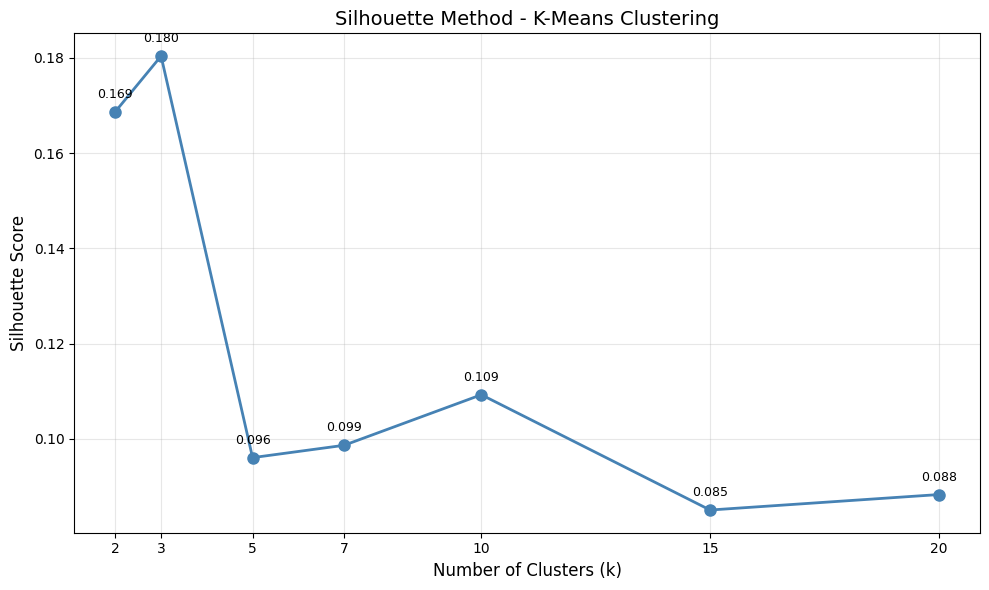


Optimal k based on Silhouette Method: 3


In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [2, 3, 5, 7, 10, 15, 20]

silhouette_scores = []

print("Calculating Silhouette Scores...")
print("-" * 40)

# converting to float once for efficiency
df_encoded_float = df_encoded.values.astype(float)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_encoded_float)
    score = silhouette_score(df_encoded_float, labels, sample_size=10000, random_state=42)
    silhouette_scores.append(score)
    print(f"k = {k:2d}  |  Silhouette Score = {score:.4f}")

print("-" * 40)

# line plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Method - K-Means Clustering', fontsize=14)
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

for i, (k, score) in enumerate(zip(k_values, silhouette_scores)):
    plt.annotate(f'{score:.3f}', (k, score), textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# best k -> max silhouette
best_k_silhouette = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal k based on Silhouette Method: {best_k_silhouette}")

In [11]:
# using k=3 for task 4
optimal_k_silhouette = 3

print(f"Selected optimal k = {optimal_k_silhouette} based on Silhouette Method")
print("=" * 50)

# fitting K-Means with k=3
kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42, n_init=10)
kmeans_silhouette.fit(df_encoded_float)

# getting cluster labels
labels_silhouette = kmeans_silhouette.labels_

# adding labels to metadata
df_metadata['cluster_silhouette'] = labels_silhouette

# cluster dist.
print("\nCluster Distribution (Silhouette k=3):")
print("-" * 30)
for cluster_id in range(optimal_k_silhouette):
    count = (labels_silhouette == cluster_id).sum()
    percentage = count / len(labels_silhouette) * 100
    print(f"Cluster {cluster_id}: {count:,} tracks ({percentage:.1f}%)")

print(f"\nTotal tracks: {len(labels_silhouette):,}")
print(f"SSE for k={optimal_k_silhouette}: {kmeans_silhouette.inertia_:,.2f}")

Selected optimal k = 3 based on Silhouette Method

Cluster Distribution (Silhouette k=3):
------------------------------
Cluster 0: 10,048 tracks (8.8%)
Cluster 1: 77,573 tracks (68.0%)
Cluster 2: 26,379 tracks (23.1%)

Total tracks: 114,000
SSE for k=3: 1,470,051.77



Dominant Genre per Cluster (Silhouette k=3):
Cluster 0: comedy (9.1%) - 910/10,048 tracks
Cluster 1: forro (1.3%) - 974/77,573 tracks
Cluster 2: sleep (3.7%) - 971/26,379 tracks


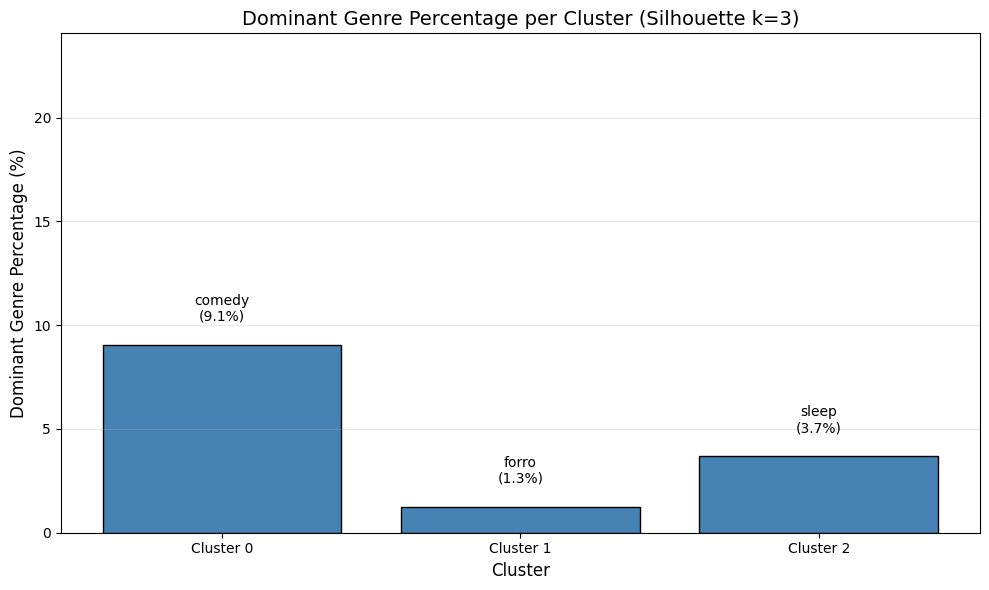

In [12]:
# using k=3 for task 5
dominant_genres_sil = []
dominant_percentages_sil = []

print("\nDominant Genre per Cluster (Silhouette k=3):")
print("=" * 60)

for cluster_id in range(optimal_k_silhouette):
    cluster_mask = df_metadata['cluster_silhouette'] == cluster_id
    cluster_genres = df_metadata[cluster_mask]['genre']

    genre_counts = cluster_genres.value_counts()
    dominant_genre = genre_counts.index[0]
    dominant_count = genre_counts.iloc[0]
    total_in_cluster = len(cluster_genres)
    percentage = (dominant_count / total_in_cluster) * 100

    dominant_genres_sil.append(dominant_genre)
    dominant_percentages_sil.append(percentage)

    print(f"Cluster {cluster_id}: {dominant_genre} ({percentage:.1f}%) - {dominant_count:,}/{total_in_cluster:,} tracks")

print("=" * 60)

# bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(range(optimal_k_silhouette), dominant_percentages_sil, color='steelblue', edgecolor='black')

for i, (bar, genre, pct) in enumerate(zip(bars, dominant_genres_sil, dominant_percentages_sil)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{genre}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10)

plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Dominant Genre Percentage (%)', fontsize=12)
plt.title('Dominant Genre Percentage per Cluster (Silhouette k=3)', fontsize=14)
plt.xticks(range(optimal_k_silhouette), [f'Cluster {i}' for i in range(optimal_k_silhouette)])
plt.ylim(0, max(dominant_percentages_sil) + 15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
# using k=3 for task 6
from scipy.spatial.distance import euclidean

selected_index = 71528
selected_track = df_metadata.iloc[selected_index]
selected_cluster_sil = selected_track['cluster_silhouette']

print("=" * 60)
print("SELECTED TRACK (Silhouette k=3)")
print("=" * 60)
print(f"Title:   {selected_track['track_name']}")
print(f"Artist:  {selected_track['artists']}")
print(f"Cluster: {selected_cluster_sil}")
print("=" * 60)

# getting all tracks in the same cluster (excluding selected track and same name)
cluster_mask = (df_metadata['cluster_silhouette'] == selected_cluster_sil) & \
               (df_metadata.index != selected_index) & \
               (df_metadata['track_name'] != selected_track['track_name'])
cluster_indices = df_metadata[cluster_mask].index.tolist()

selected_features = df_encoded_float[selected_index]
cluster_features = df_encoded_float[cluster_indices]

# calc. Euclidean distances
distances = []
for i, idx in enumerate(cluster_indices):
    dist = euclidean(selected_features, cluster_features[i])
    distances.append((idx, dist))

distances.sort(key=lambda x: x[1])
top_3_euc_sil = distances[:3]

print("\nTOP-3 RECOMMENDED SONGS (Euclidean Distance, Silhouette k=3):")
print("-" * 60)
for rank, (idx, dist) in enumerate(top_3_euc_sil, 1):
    track = df_metadata.iloc[idx]
    print(f"\n{rank}. {track['track_name']}")
    print(f"   Artist:   {track['artists']}")
    print(f"   Distance: {dist:.4f}")
print("-" * 60)

SELECTED TRACK (Silhouette k=3)
Title:   Born To Be Wild
Artist:  Steppenwolf
Cluster: 1

TOP-3 RECOMMENDED SONGS (Euclidean Distance, Silhouette k=3):
------------------------------------------------------------

1. I Ran (So Far Away)
   Artist:   A Flock Of Seagulls
   Distance: 2.1422

2. I Don't Care Anymore
   Artist:   Cathedral Bells
   Distance: 2.2918

3. The Unknown
   Artist:   peach tinted
   Distance: 2.3450
------------------------------------------------------------


In [14]:
# using k=3 task 7
from scipy.spatial.distance import cosine

distances_cos = []
for i, idx in enumerate(cluster_indices):
    dist = cosine(selected_features, cluster_features[i])
    distances_cos.append((idx, dist))

distances_cos.sort(key=lambda x: x[1])
top_3_cos_sil = distances_cos[:3]

print("\nTOP-3 RECOMMENDED SONGS (Cosine Distance, Silhouette k=3):")
print("-" * 60)
for rank, (idx, dist) in enumerate(top_3_cos_sil, 1):
    track = df_metadata.iloc[idx]
    print(f"\n{rank}. {track['track_name']}")
    print(f"   Artist:   {track['artists']}")
    print(f"   Distance: {dist:.4f}")
print("-" * 60)

# comparison of elbow-7 and silhouette-3
print("\n" + "=" * 60)
print("COMPARISON: ELBOW (k=7) vs SILHOUETTE (k=3)")
print("=" * 60)
print("\nElbow (k=7) - Euclidean:")
for rank, (idx, dist) in enumerate(euclidean_recommendations, 1):
    track = df_metadata.iloc[idx]
    print(f"  {rank}. {track['track_name']} - {track['artists']}")

print("\nSilhouette (k=3) - Euclidean:")
for rank, (idx, dist) in enumerate(top_3_euc_sil, 1):
    track = df_metadata.iloc[idx]
    print(f"  {rank}. {track['track_name']} - {track['artists']}")


TOP-3 RECOMMENDED SONGS (Cosine Distance, Silhouette k=3):
------------------------------------------------------------

1. Any Colour You Like
   Artist:   Pink Floyd
   Distance: 0.1958

2. I Ran (So Far Away)
   Artist:   A Flock Of Seagulls
   Distance: 0.2331

3. Dark Entries
   Artist:   Bauhaus
   Distance: 0.2408
------------------------------------------------------------

COMPARISON: ELBOW (k=7) vs SILHOUETTE (k=3)

Elbow (k=7) - Euclidean:
  1. I Ran (So Far Away) - A Flock Of Seagulls
  2. I Don't Care Anymore - Cathedral Bells
  3. This Is Not The End - Gareth Emery;Roddy Woomble

Silhouette (k=3) - Euclidean:
  1. I Ran (So Far Away) - A Flock Of Seagulls
  2. I Don't Care Anymore - Cathedral Bells
  3. The Unknown - peach tinted


Παρατηρησεις:
- Οι προτασεις ειναι σχεδον ιδιες και με τις δυο μεθοδους επιλογης k
- Το "I Ran (So Far Away)" και "I Don't Care Anymore" εμφανιζονται και στις δυο
- Μονο η 3η προταση διαφερει: "This Is Not The End" (k=7) vs "The Unknown" (k=3)

Αυτο συμβαινει γιατι:
- Με k=3 εχουμε μεγαλυτερα clusters (λιγοτερες ομαδες = περισσοτερα τραγουδια ανα ομαδα)
- Με k=7 εχουμε μικροτερα, πιο εξειδικευμενα clusters
- Ομως το "Born To Be Wild" βρισκει παρομοια τραγουδια και στις δυο περιπτωσεις

Συμπερασμα: Για το συγκεκριμενο τραγουδι, η επιλογη k δεν επηρεαζει
σημαντικα την ποιοτητα των προτασεων. Οι κοντινοτεροι γειτονες παραμενουν
σταθεροι ανεξαρτητα απο τον αριθμο των clusters.

# Task 9: DBSCAN (or HDBSCAN/faster) Clustering Implementation

In [15]:
try:
    import hdbscan
except ImportError:
    !pip install hdbscan
    import hdbscan

print("Running HDBSCAN clustering...")
print("Αυτο μπορει να παρει 15-30 λεπτα λογω του μεγεθους του dataset...")
print("=" * 50)

# fitting HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=10, core_dist_n_jobs=-1)
hdbscan_labels = clusterer.fit_predict(df_encoded_float)

print("Done!")

# adding labels to metadata
df_metadata['cluster_hdbscan'] = hdbscan_labels

# counting clusters (excluding noise which is labeled as -1)
n_clusters_hdbscan = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = (hdbscan_labels == -1).sum()

print(f"\nHDBSCAN Results:")
print("-" * 50)
print(f"Number of clusters found: {n_clusters_hdbscan}")
print(f"Noise points (outliers): {n_noise:,} ({n_noise/len(hdbscan_labels)*100:.1f}%)")

# cluster dist.
print("\nCluster Distribution:")
print("-" * 30)
for cluster_id in sorted(set(hdbscan_labels)):
    count = (hdbscan_labels == cluster_id).sum()
    percentage = count / len(hdbscan_labels) * 100
    label = "Noise" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"{label}: {count:,} tracks ({percentage:.1f}%)")

# comp. with K-Means
print("\n" + "=" * 50)
print("ΣΥΓΚΡΙΣΗ ΑΡΙΘΜΟΥ CLUSTERS")
print("=" * 50)
print(f"Elbow Method (K-Means):      k = 7")
print(f"Silhouette Method (K-Means): k = 3")
print(f"HDBSCAN:                     {n_clusters_hdbscan} clusters + {n_noise:,} noise points")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 89.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.41-cp312-cp312-linux_x86_64.whl size=3981384 sha256=287ba6b7b789eddb8cd726b87056583261e93b6dfcc49306911bf7b53178943c
  Stored in directory: /root/.cache/pip/wheels/e2/53/4a/d7024a5080d04d817e23665a89ca76563c9f17a8245b242a06
Successfully built hdbscan
Running HDBSCAN clustering...
Αυτο μπορει να παρει 15-30 λεπτα λογω του μεγεθους του dataset...
Done!

HDBSCAN Results:
--------------------------------------------------
Number of clusters found: 4
Noise points (outliers): 647 (0.6%)

Cluster Distribution:
------------------------------
Noise: 647 tracks (0.6%)
Cluster 0: 795 tracks (0.7%)
Cluster 1: 131 tracks (0.1%)
Cluster 2: 102,844 tracks (90.2%)
Cluster 3: 9,583 tracks (8.4%)

ΣΥΓΚΡΙΣΗ ΑΡΙΘΜΟΥ CLUSTERS
Elbow Method (K-Means



1.   Elbow Method (K-Means):      k = 7 clusters
2.   Silhouette Method (K-Means): k = 3 clusters
3.   HDBSCAN: 4 clusters + 647 noise points (0.6%)

<br>


ΠΑΡΑΤΗΡΗΣΕΙΣ:
- Ο HDBSCAN βρηκε 4 clusters, κοντα στο αποτελεσμα ης Silhouette (k=3)
- Το 90.2% των τραγουδιων ανηκουν σε ενα μεγαλο cluster (Cluster 2). Αυτο δειχνει οτι τα περισσοτερα τραγουδια εχουν παρομοια χαρακτηριστικα
- Ο HDBSCAN εντοπισε 647 outliers (noise) - τραγουδια που δεν ταιριαζουν πουθενα
- Τα clusters 0, 1, 3 ειναι μικροτερα και πιθανον περιεχουν πιο περιεργα/ιδιαιτερα τραγουδια

<br>

ΣΥΜΠΕΡΑΣΜΑ:
- Ο K-Means με Elbow (k=7) δινει πιο ισορροπημενα clusters
- Ο HDBSCAN αποκαλυπτει οτι τα δεδομενα εχουν φυσικα 4 ομαδες (και μια πολυ μεγαλη)
- Η επιλογη αλγοριθμου εξαρταται απο τον στοχο: για recommendations, για παραδειγμα, ο K-Means με περισσοτερα clusters μπορει να δωσει πιο εξειδικευμενες προτασεις

# Bonus Task: DBSCAN++ Implementation

Δοκιμασα να το τρεξω, αλλα το ρεπο ειναι outdated, πακετα δε λειτουργουν και θελει αρκετο refinement για να τρεξει, οποτε δε θα τρεξω αυτο το ερωτημα γιατι δεν ειναι ετοιμο το alt repo.